### 2. Take a picture with a new friend from this workshop. Convert your colored digital image to blue B, green G, and red R intensity matrices. For each intensity matrix (channel), take its singular value decomposition and plot the singular values and corresponding image variance. Determine the lowest possible $p$ so that the truncated SVDs yield at least 80% image variance in all color channels. Plot the corresponding compressed colored image.


In [ ]:
import cv2
import numpy as np
Img = cv2.imread("Beautifullest.jpg", cv2.IMREAD_COLOR);
B = Img[:,:,0]
G = Img[:,:,1]
R = Img[:,:,2]

print(Img.shape)

(2048, 1536, 3)


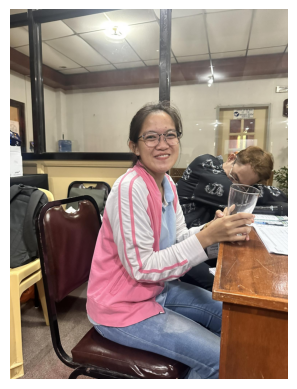

In [ ]:
import matplotlib.pyplot as plt
Img = cv2.merge([R,G,B])     # switch to RGB

plt.imshow(Img, vmin = 0, vmax = 255)
plt.axis("off")
plt.show()

In [ ]:
from numpy.linalg import svd
U_B, S_B, Vh_B = svd(B, full_matrices=False)
#print(U.shape, S.shape, Vh.shape)

(1536,)


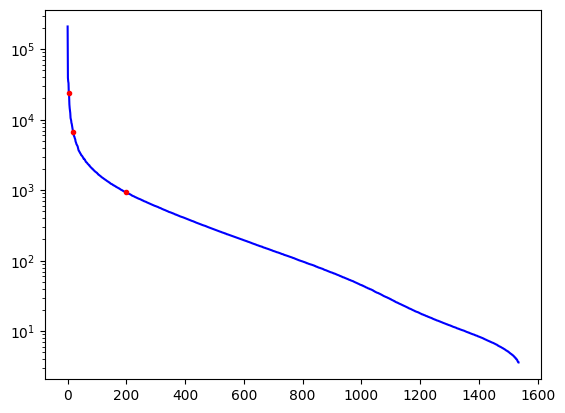

In [ ]:
plt.plot(S_B,'b')
plt.semilogy();

print(S_B.shape)

p = np.array([5,20,200]);
for i in p:
  plt.plot(i-1, S_B[i-1],'r.')

In [ ]:
U_G, S_G, Vh_G = svd(G, full_matrices=False)

(1536,)


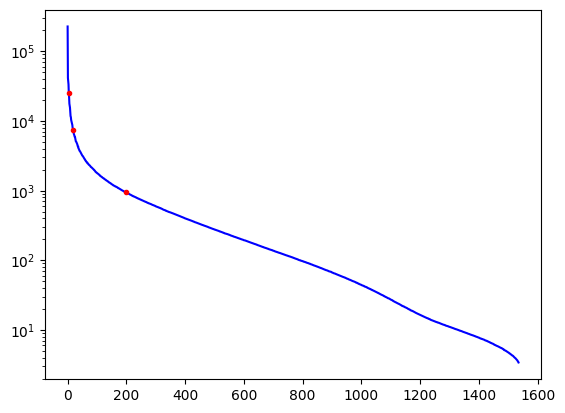

In [ ]:
plt.plot(S_G,'b')
plt.semilogy();

print(S_G.shape)

p = np.array([5,20,200]);
for i in p:
  plt.plot(i-1, S_G[i-1],'r.')

In [ ]:
U_R, S_R, Vh_R = svd(R, full_matrices=False)

(1536,)


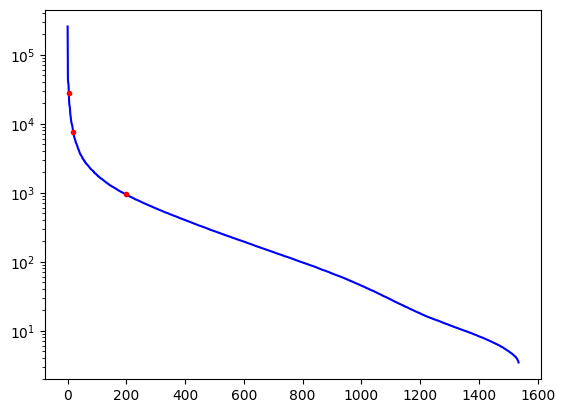

In [ ]:
plt.plot(S_R,'b')
plt.semilogy();

print(S_R.shape)

p = np.array([5,20,200]);
for i in p:
  plt.plot(i-1, S_R[i-1],'r.')

In [ ]:
p = 211;

ApproxImg_B = (U_B[:,0:p] * S_B[0:p]) @ Vh_B[0:p,:]
ApproxImg_G = (U_G[:,0:p] * S_G[0:p]) @ Vh_G[0:p,:]
ApproxImg_R = (U_R[:,0:p] * S_R[0:p]) @ Vh_R[0:p,:]

New_Img = cv2.merge([ApproxImg_R,ApproxImg_G,ApproxImg_B])     # switch to RGB



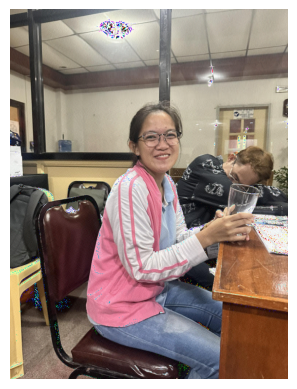

In [ ]:
New_Img = New_Img.astype(np.uint8)

plt.imshow(New_Img)
plt.axis("off")
plt.show()

211 0.800246894285537
[0.19013938 0.22558941 0.25723524 ... 0.99999347 0.99999674 1.        ]


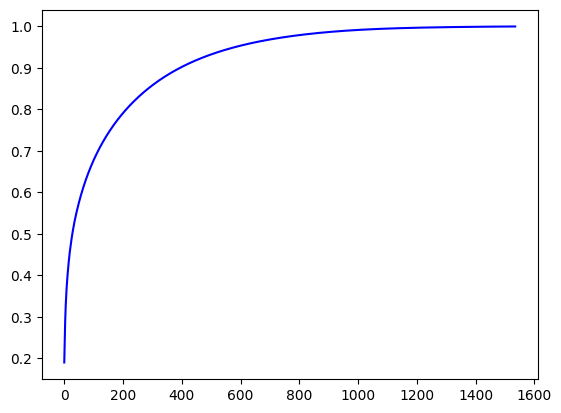

In [ ]:
ImgVar_B = np.cumsum(S_B)/np.sum(S_B);
pB=0
for i in range(1536):
  if ImgVar_B[i]>=0.8:
    pB = i
    break
print(pB, ImgVar_B[pB])

print(ImgVar_B)
plt.plot(ImgVar_B, 'b')
plt.show()

211 0.8000222736683452
[0.19520507 0.23086291 0.2628865  ... 0.99999401 0.99999704 1.        ]


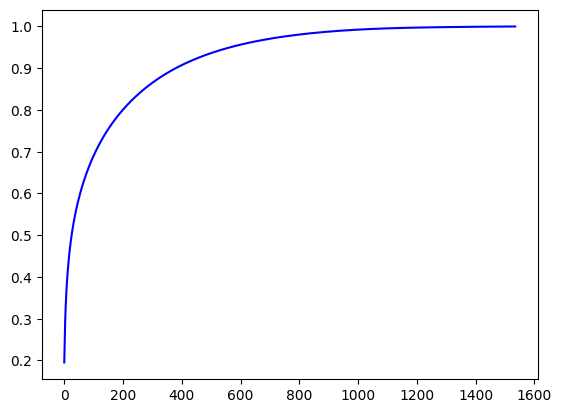

In [ ]:
ImgVar_G = np.cumsum(S_G)/np.sum(S_G);

pG=0
for i in range(1536):
  if ImgVar_G[i]>=0.8:
    pG = i
    break
print(pB, ImgVar_G[pG])

print(ImgVar_G)
plt.plot(ImgVar_G, 'b')
plt.show()

211 0.8005942261048642
[0.21189991 0.24788256 0.27971809 ... 0.9999942  0.99999716 1.        ]


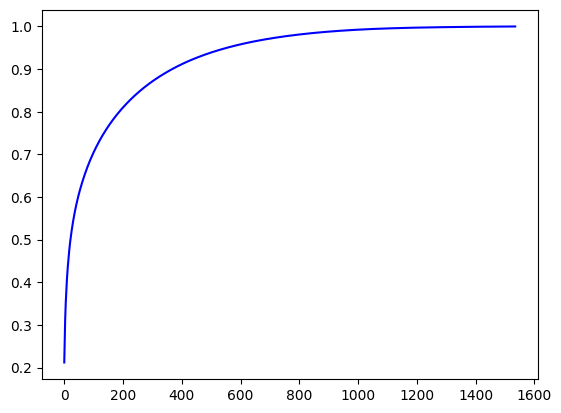

In [ ]:
ImgVar_R = np.cumsum(S_R)/np.sum(S_R);
pR=0
for i in range(1536):
  if ImgVar_R[i]>=0.8:
    pR = i
    break
print(pB, ImgVar_R[pR])
print(ImgVar_R)
plt.plot(ImgVar_R, 'b')
plt.show()